In [49]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
import pickle

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss,recall_score,f1_score,precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [5]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [13]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy","Recall Score","F1 Score","Precision Score"]
log = pd.DataFrame(columns=log_cols)

In [52]:
def map_for_emb(emb):
    return {'C':1,'S':2,'Q':3}.get(emb,10)
data=pd.read_csv('/data.csv')
data.head()
labelencoder = LabelEncoder()
data['Gender_cat'] = labelencoder.fit_transform(data['Gender'])
data=data.drop(['Gender'],axis=1)
data.rename(columns={'Gender_cat':'Gender'},inplace=True)
data.head()
y=data['Survived'].values
data=data.drop(['PassengerId','Survived'],axis=1)
enc=ce.OrdinalEncoder(cols=['Embarked'],return_df=True)
data=enc.fit_transform(data)
X=data.values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [43]:
print(data['PClass'].unique())
print(data['Sibling'].unique())
print(data['Embarked'].unique())
print(data['Gender'].unique())

[3 1 2]
[1 0 3 4 2 5 8]
[1 2 3 4]
[1 0]


In [15]:
X

array([[3, 1, 1, 1],
       [1, 1, 2, 0],
       [3, 0, 1, 0],
       ...,
       [3, 0, 1, 1],
       [3, 0, 1, 1],
       [3, 1, 2, 1]])

In [16]:
y

array([0, 1, 1, ..., 0, 0, 0])

In [44]:
accuracies=[]
models=[]

In [50]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results For Train Test Split****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    accuracies.append(acc)
    models.append(clf)
    rec = recall_score(y_test, train_predictions)
    print("Recall Score: {:.4%}".format(rec))
    
    
    f1 = f1_score(y_test, train_predictions)
    print("F1 Score: {:.4%}".format(f1))
    
    
    prec = precision_score(y_test, train_predictions)
    print("Precision Score: {:.4%}".format(prec))
        
    log_entry = pd.DataFrame([[name, acc*100,rec,f1,prec]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)
ind=np.argmax(accuracies)
filename = 'finalized_model.sav'
pickle.dump(models[ind], open(filename, 'wb'))

KNeighborsClassifier
****Results For Train Test Split****
Accuracy: 81.6794%
Recall Score: 78.4483%
F1 Score: 79.1304%
Precision Score: 79.8246%
SVC
****Results For Train Test Split****
Accuracy: 82.4427%
Recall Score: 73.2759%
F1 Score: 78.7037%
Precision Score: 85.0000%
NuSVC
****Results For Train Test Split****
Accuracy: 87.4046%
Recall Score: 85.3448%
F1 Score: 85.7143%
Precision Score: 86.0870%
DecisionTreeClassifier
****Results For Train Test Split****
Accuracy: 87.4046%
Recall Score: 85.3448%
F1 Score: 85.7143%
Precision Score: 86.0870%
RandomForestClassifier
****Results For Train Test Split****
Accuracy: 87.0229%
Recall Score: 86.2069%
F1 Score: 85.4701%
Precision Score: 84.7458%
AdaBoostClassifier
****Results For Train Test Split****
Accuracy: 87.0229%
Recall Score: 86.2069%
F1 Score: 85.4701%
Precision Score: 84.7458%
GradientBoostingClassifier
****Results For Train Test Split****
Accuracy: 87.0229%
Recall Score: 86.2069%
F1 Score: 85.4701%
Precision Score: 84.7458%
GaussianN

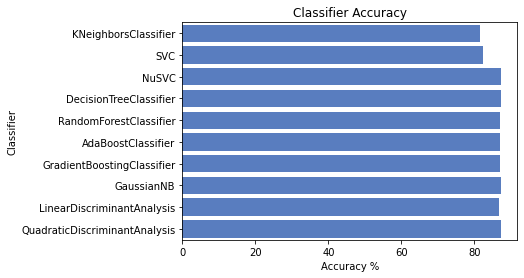

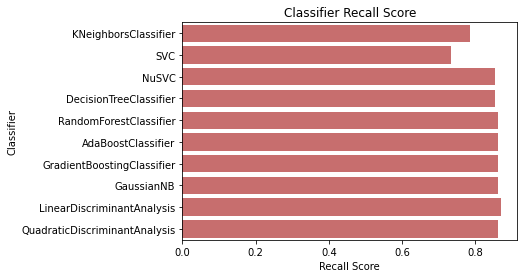

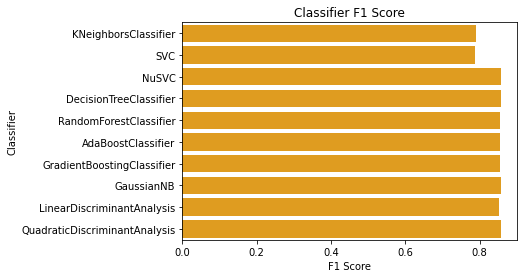

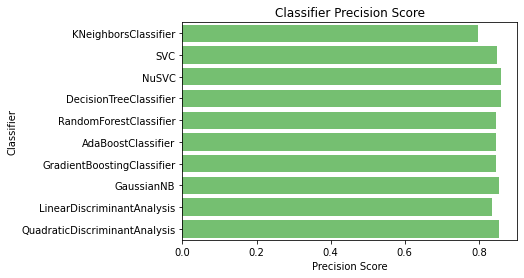

In [40]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Recall Score', y='Classifier', data=log, color="r")

plt.xlabel('Recall Score')
plt.title('Classifier Recall Score')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='F1 Score', y='Classifier', data=log, color="orange")

plt.xlabel('F1 Score')
plt.title('Classifier F1 Score')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Precision Score', y='Classifier', data=log, color="g")

plt.xlabel('Precision Score')
plt.title('Classifier Precision Score')
plt.show()

In [39]:
log10fold = pd.DataFrame(columns=log_cols)
for clf in classifiers:
    cv = KFold(n_splits=10, random_state=0, shuffle=False)
    score={}
    score['accuracy']=[]
    score['recall']=[]
    score['f1']=[]
    score['precision']=[]
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        score['accuracy'].append(acc)
        rec = recall_score(y_test, train_predictions)
        score['recall'].append(rec)
        f1 = f1_score(y_test, train_predictions)
        score['f1'].append(f1)
        prec = precision_score(y_test, train_predictions)
        score['precision'].append(prec)

    name = clf.__class__.__name__

    print("="*30)
    print(name)
    print('****Results For 10Fold Validation****')
    print("Accuracy: {:.4%}".format(np.mean(score['accuracy'])))
    print("Recall Score: {:.4%}".format(np.mean(score['recall'])))
    print("F1 Score: {:.4%}".format(np.mean(score['f1'])))
    print("Precision Score: {:.4%}".format(np.mean(score['precision'])))
    log_entry = pd.DataFrame([[name, acc*100,rec,f1,prec]], columns=log_cols)
    log10fold = log10fold.append(log_entry)

print("="*30)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNeighborsClassifier
****Results For 10Fold Validation****
Accuracy: 78.8450%
Recall Score: 67.6615%
F1 Score: 70.8446%
Precision Score: 76.9928%
SVC
****Results For 10Fold Validation****
Accuracy: 85.7246%
Recall Score: 75.1746%
F1 Score: 79.6205%
Precision Score: 84.9238%


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NuSVC
****Results For 10Fold Validation****
Accuracy: 85.8773%
Recall Score: 76.1338%
F1 Score: 80.0239%
Precision Score: 84.5968%
DecisionTreeClassifier
****Results For 10Fold Validation****
Accuracy: 85.9536%
Recall Score: 76.7253%
F1 Score: 80.2277%
Precision Score: 84.2886%


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RandomForestClassifier
****Results For 10Fold Validation****
Accuracy: 85.9536%
Recall Score: 76.7253%
F1 Score: 80.2506%
Precision Score: 84.3195%


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AdaBoostClassifier
****Results For 10Fold Validation****
Accuracy: 85.8779%
Recall Score: 77.1435%
F1 Score: 80.2108%
Precision Score: 83.8040%


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GradientBoostingClassifier
****Results For 10Fold Validation****
Accuracy: 85.5719%
Recall Score: 76.7253%
F1 Score: 79.8327%
Precision Score: 83.4306%
GaussianNB
****Results For 10Fold Validation****
Accuracy: 85.7252%
Recall Score: 77.1609%
F1 Score: 80.1389%
Precision Score: 83.5754%
LinearDiscriminantAnalysis
****Results For 10Fold Validation****
Accuracy: 85.4198%
Recall Score: 78.0092%
F1 Score: 80.0212%
Precision Score: 82.3799%
QuadraticDiscriminantAnalysis
****Results For 10Fold Validation****
Accuracy: 86.0305%
Recall Score: 76.9525%
F1 Score: 80.3714%
Precision Score: 84.3324%


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


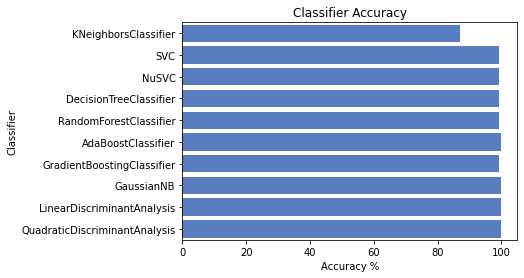

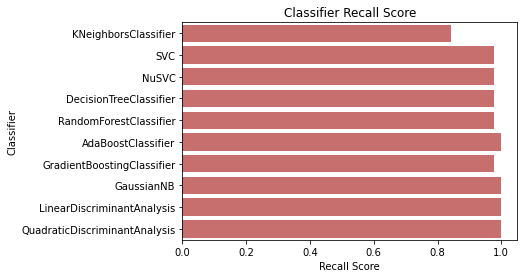

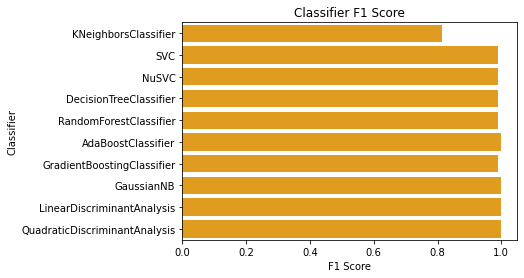

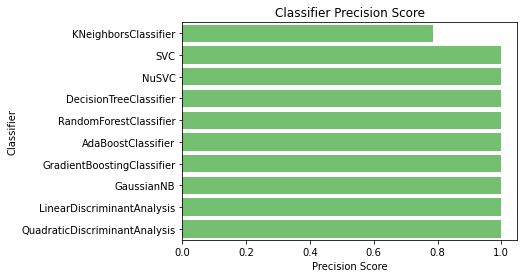

In [38]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log10fold, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()
sns.set_color_codes("muted")
sns.barplot(x='Recall Score', y='Classifier', data=log10fold, color="r")

plt.xlabel('Recall Score')
plt.title('Classifier Recall Score')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='F1 Score', y='Classifier', data=log10fold, color="orange")

plt.xlabel('F1 Score')
plt.title('Classifier F1 Score')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Precision Score', y='Classifier', data=log10fold, color="g")

plt.xlabel('Precision Score')
plt.title('Classifier Precision Score')
plt.show()

In [59]:
print("Give Inputs to predict passengers survival\n")
gender=int(input("Gender(0 or 1: "))
while gender != 0 and gender != 1:
  print("Value for gender must be either 0 or 1 \n\n\t\tEnter Gender(0 or 1): ")
  gender=int(input("Gender(0 or 1: "))
pclass=int(input("Passenger Class(1 or 2 or 3): "))
while pclass != 1 and pclass != 2 and pclass != 3:
  print("Value for passenger class must be either 1 or 2 or 3 \n\n\t\tEnter Passenger Class(1 or 2 or 3): ")
  pclass=int(input("Passenger Class(1 or 2 or 3): "))
embarked=int(input("Embarked(1 or 2 or 3 or 4): "))
while embarked != 1 and embarked != 2 and embarked != 3 and embarked != 4:
  print("Value for Embarked must be either 1 or 2 or 3 or 4 \n\n\t\tEnter Embarked(1 or 2 or 3 or 4): ")
  embarked=int(input("Embarked(1 or 2 or 3 or 4): "))
sibling=int(input("Sibling(0 or 1 or 2 or 3 or 4 or 5 or 8): "))
while sibling != 0 and sibling != 1 and sibling != 2 and sibling != 3 and sibling != 4 and sibling != 5 and sibling != 8:
  print("Value for sibling must be either 0 or 1 or 2 or 3 or 4 or 5 or 8 \n\n\t\tEnter Sibling(0 or 1 or 2 or 3 or 4 or 5 or 8): ")
  sibling=int(input("Sibling(0 or 1 or 2 or 3 or 4 or 5 or 8): "))

inputs=[pclass,sibling,embarked,gender]
inputs=np.array(inputs)
inputs=inputs.reshape(1,-1)
loaded_model = pickle.load(open(filename, 'rb'))
result=loaded_model.predict(inputs)
if result == 0:
  print("\n\n\t\tPassenger does not survive")
else:
  print("\n\n\t\tThe passenger survived.")


Give Inputs to predict passengers survival

Gender(0 or 1: 0
Passenger Class(1 or 2 or 3): 2
Embarked(1 or 2 or 3 or 4): 3
Sibling(0 or 1 or 2 or 3 or 4 or 5 or 8): 0


		The passenger survived.
